In [1]:
#导入相关库
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

In [3]:
raw_data=pd.read_csv(r"european_cities.csv")
data=raw_data.copy()
data.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13


# 查看数据类型

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


# 查看Shape

In [6]:
data.shape

(105, 5)

# 是否有缺失值

In [7]:
data.isnull().sum()

Rank                       0
City                       0
State                      0
Population                 0
Date of census/estimate    0
dtype: int64

# 对数据进行清洗

In [18]:
data.City

0       London[2]
1          Berlin
2          Madrid
3            Rome
4           Paris
          ...    
100          Bonn
101         Malmö
102    Nottingham
103      Katowice
104        Kaunas
Name: City, Length: 105, dtype: object

In [20]:
data.City[~data.City.str.isalpha()]

0             London[2]
7           Hamburg[10]
15         Brussels[17]
56            The Hague
71    Palma de Mallorca
73           Las Palmas
92          Cluj-Napoca
Name: City, dtype: object

In [21]:
data.City[[0,7,15]]=['London','Hamburg','Brussels']
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rank,City,State,Population,Date of census/estimate
0,1,London,United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13
...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12


# 重新设置索引

In [24]:
data.index=data.Rank
data.pop("Rank")

Rank
1        1
2        2
3        3
4        4
5        5
      ... 
101    101
102    102
103    103
104    104
105    105
Name: Rank, Length: 105, dtype: int64

In [25]:
data

,City,State,Population,Date of census/estimate
Rank,,,,
1,London,United Kingdom,"8,615,246",1-Jun-14
2,Berlin,Germany,"3,437,916",31-May-14
3,Madrid,Spain,"3,165,235",1-Jan-14
4,Rome,Italy,"2,872,086",30-Sep-14
5,Paris,France,"2,273,305",1-Jan-13
...,...,...,...,...
101,Bonn,Germany,"309,869",31-Dec-12
102,Malmö,Sweden,"309,105",31-Mar-13
103,Nottingham,United Kingdom,"308,735",30-Jun-12


# 查看哪个国家城市最多

In [27]:
data.head()

,City,State,Population,Date of census/estimate
Rank,,,,
1,London,United Kingdom,"8,615,246",1-Jun-14
2,Berlin,Germany,"3,437,916",31-May-14
3,Madrid,Spain,"3,165,235",1-Jan-14
4,Rome,Italy,"2,872,086",30-Sep-14
5,Paris,France,"2,273,305",1-Jan-13


In [39]:
data.groupby("State")['City'].count().sort_values(ascending=False)[0]

19

In [42]:
data.groupby("State")['City'].count().nlargest(1)

State
 Germany    19
Name: City, dtype: int64

In [44]:
data.State.value_counts()[0]

19

# 查看哪个国家人口最多

In [45]:
data

,City,State,Population,Date of census/estimate
Rank,,,,
1,London,United Kingdom,"8,615,246",1-Jun-14
2,Berlin,Germany,"3,437,916",31-May-14
3,Madrid,Spain,"3,165,235",1-Jan-14
4,Rome,Italy,"2,872,086",30-Sep-14
5,Paris,France,"2,273,305",1-Jan-13
...,...,...,...,...
101,Bonn,Germany,"309,869",31-Dec-12
102,Malmö,Sweden,"309,105",31-Mar-13
103,Nottingham,United Kingdom,"308,735",30-Jun-12


In [48]:
data.Population

Rank
1      8,615,246
2      3,437,916
3      3,165,235
4      2,872,086
5      2,273,305
         ...    
101      309,869
102      309,105
103      308,735
104      308,269
105      306,888
Name: Population, Length: 105, dtype: object

看到带有分隔符的数值数据，如何想如何把分隔符从字符串中剔除。

In [ ]:
"8,615,246"--->  '8615246'

In [50]:
'abcdaaa'.replace("a","A")

'AbcdAAA'

In [51]:
"8,615,246".replace(",","")

'8615246'

In [54]:
popu=data.Population.str.replace(",","")
popu

Rank
1      8615246
2      3437916
3      3165235
4      2872086
5      2273305
        ...   
101     309869
102     309105
103     308735
104     308269
105     306888
Name: Population, Length: 105, dtype: object

In [55]:
popu.astype(int)

Rank
1      8615246
2      3437916
3      3165235
4      2872086
5      2273305
        ...   
101     309869
102     309105
103     308735
104     308269
105     306888
Name: Population, Length: 105, dtype: int32

In [57]:
data.Population=popu.astype(int)
data

,City,State,Population,Date of census/estimate
Rank,,,,
1,London,United Kingdom,8615246,1-Jun-14
2,Berlin,Germany,3437916,31-May-14
3,Madrid,Spain,3165235,1-Jan-14
4,Rome,Italy,2872086,30-Sep-14
5,Paris,France,2273305,1-Jan-13
...,...,...,...,...
101,Bonn,Germany,309869,31-Dec-12
102,Malmö,Sweden,309105,31-Mar-13
103,Nottingham,United Kingdom,308735,30-Jun-12


In [60]:
data.groupby("State")["Population"].sum().nlargest(1)

State
 United Kingdom    16011877
Name: Population, dtype: int32

In [62]:
countries=data.groupby("State")["Population"].sum()
countries

State
 Austria                     1794770
 Belgium                     1686441
 Bulgaria                    1968755
 Croatia                      790017
 Czech Republic              1625107
 Denmark                      886116
 Estonia                      434810
 Finland                      605523
 France                      4395271
 Germany                    15119548
 Greece                       986286
 Hungary                     1744665
 Ireland                      527612
 Italy                       8764067
 Latvia                       701185
 Lithuania                    844040
 Netherlands                 2271771
 Poland                      6267409
 Portugal                     547631
 Romania                     2527280
 Spain                      10041639
 Sweden                      1747095
 United Kingdom             16011877
Slovakia Slovak Republic      417389
Name: Population, dtype: int32

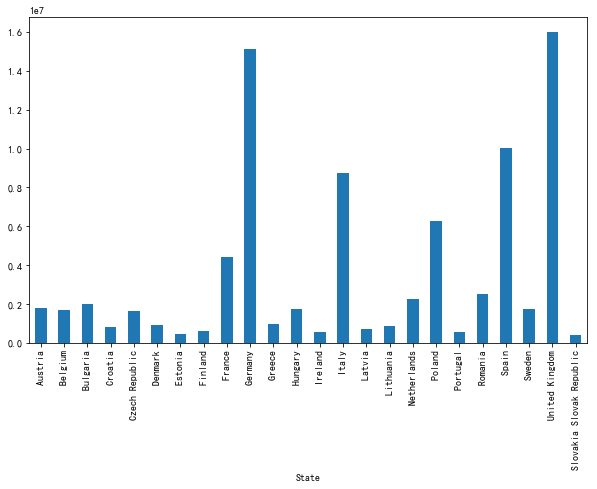

In [68]:
countries.plot(kind='bar',figsize=(10,6))

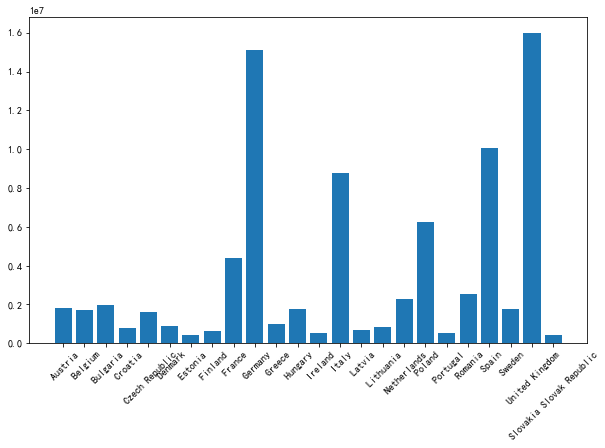

In [79]:
x=countries.index
y=countries

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.xticks(rotation='45')
plt.show()

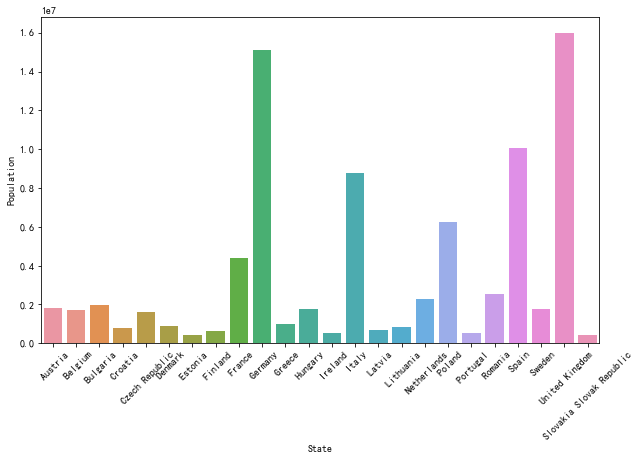

In [88]:
x=countries.index
y=countries

import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x,y)
plt.xticks(rotation='45')
plt.show()

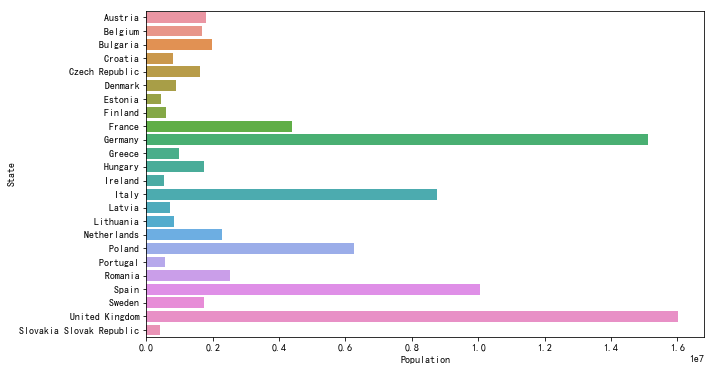

In [85]:
x=countries.index
y=countries

import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(y,x,orient='h')

# 日期格式化

In [89]:
data

,City,State,Population,Date of census/estimate
Rank,,,,
1,London,United Kingdom,8615246,1-Jun-14
2,Berlin,Germany,3437916,31-May-14
3,Madrid,Spain,3165235,1-Jan-14
4,Rome,Italy,2872086,30-Sep-14
5,Paris,France,2273305,1-Jan-13
...,...,...,...,...
101,Bonn,Germany,309869,31-Dec-12
102,Malmö,Sweden,309105,31-Mar-13
103,Nottingham,United Kingdom,308735,30-Jun-12


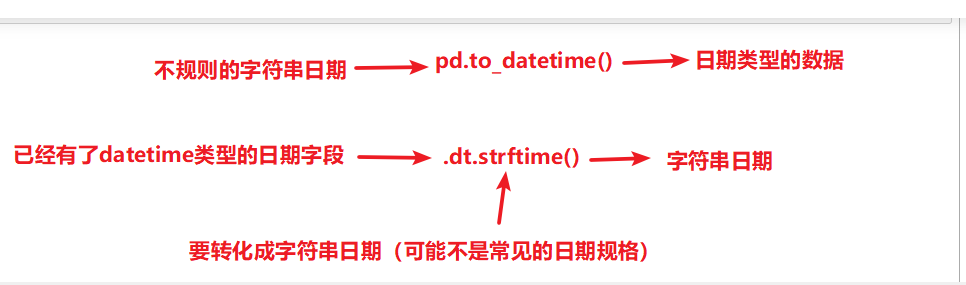

In [90]:
data["Date of census/estimate"]

Rank
1       1-Jun-14
2      31-May-14
3       1-Jan-14
4      30-Sep-14
5       1-Jan-13
         ...    
101    31-Dec-12
102    31-Mar-13
103    30-Jun-12
104    30-Jun-12
105     1-Jan-13
Name: Date of census/estimate, Length: 105, dtype: object

In [91]:
pd.to_datetime(data["Date of census/estimate"])

Rank
1     2014-06-01
2     2014-05-31
3     2014-01-01
4     2014-09-30
5     2013-01-01
         ...    
101   2012-12-31
102   2013-03-31
103   2012-06-30
104   2012-06-30
105   2013-01-01
Name: Date of census/estimate, Length: 105, dtype: datetime64[ns]

In [92]:
pd.to_datetime(data["Date of census/estimate"]).dt.strftime("%Y/%m/%d")

Rank
1      2014/06/01
2      2014/05/31
3      2014/01/01
4      2014/09/30
5      2013/01/01
          ...    
101    2012/12/31
102    2013/03/31
103    2012/06/30
104    2012/06/30
105    2013/01/01
Name: Date of census/estimate, Length: 105, dtype: object

小心：日期类型series调用.dt.strftime()方法后返回来的对象的数据类型是object类型